# Medical ChatBot-RAG Based Approach

The project aims to develop a robust Retrieval-Augmented Generation (RAG) based medical chatbot to overcome the limitations observed within the medical domain. Medical chatbots offer instant access to healthcare information, guidance, and support, augmenting healthcare accessibility and efficiency. They provide timely responses to queries, aiding in symptom assessment, medication reminders, and wellness advice. Particularly beneficial in remote areas or during non-office hours, they reduce strain on healthcare systems, offering preliminary assessments and reassurance to users. Additionally, they enhance patient education, promoting proactive healthcare practices and facilitating early intervention for potential health issues. Through continuous learning and adaptation, medical chatbots evolve to meet user needs, fostering a more informed and empowered healthcare experience while alleviating pressure on traditional medical services.


## Notebook Breakdown:

- Importing Required Resources: This step involves identifying and bringing in all necessary tools, and other resources required for the project. This may include programming languages, machine learning frameworks, data collection tools, and any other dependencies.

- Data Gathering and Preparation: In this phase, data relevant to the project is collected, this could include data cleaning, preprocessing, and structuring the data in a format suitable for analysis or modeling.

- Creating a Vector Database using only the contexts: Here, the collected data is transformed into numerical vectors while preserving semantic meaning. This typically involves techniques such as word embedding models or contextual embedding models to represent words or sentences as dense vectors.

- Testing Vector Database: After creating the vector database, it's important to validate its effectiveness. This could involve querying the database with known inputs and verifying that the retrieved vectors match expectations.

- Testing the Vector Database if the same question is paraphrased: This step involves assessing the robustness of the vector database to handle paraphrased queries. It tests whether the database can accurately retrieve relevant vectors even when the query is rephrased or expressed differently.

- Creating Retrieval Augmented Generation (RAG) pipeline using LANGCHAIN: Building upon the vector database, this step involves constructing a pipeline that integrates retrieval and generation techniques using LANGCHAIN.

- Evaluating the RAG pipeline using RAGAS: Once the RAG pipeline is established, it needs to be evaluated for its effectiveness in generating relevant responses to queries. RAGAS (Retrieval Augmented Generation Assessment Suite) could be a standardized evaluation framework or set of metrics used for this evaluation.

- Performance Measures: Various metrics and performance measures are calculated to assess the efficiency and effectiveness of the RAG pipeline.

- Evaluation Results: Finally, the results of the evaluation are summarized and analyzed. This includes faithfulness", "context_precision", "context_recall", "answer_similarity", "answer_relevancy", "answer_correctness".

## Importing necessary libraries

In [3]:
!pip install datasets pinecone-client sentence-transformers torch tqdm langchain langchain-openai pinecone-text transformers numpy pandas seaborn matplotlib ragas


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:0

In [7]:
from datasets import load_dataset # Used to load dataset from Hugging face
from warnings import filterwarnings # Used to filter warnings
from pinecone import Pinecone # Used to create vector database
from sentence_transformers import SentenceTransformer # Used to create dense vector embeddings
import torch # Used for torch operations
from pinecone_text.sparse import SpladeEncoder # Used to create sparse embeddings
import os # Used for OS operations
from tqdm import tqdm # Used for tracking the progress
from langchain.vectorstores import Pinecone as pc # Used for connecting the vectordatabase to the RAG pipeline
from langchain_community.embeddings import SentenceTransformerEmbeddings # Used for converting retrieval queries into dense vector embeddings
from langchain_openai import ChatOpenAI # Used for text generation
from langchain.chains import RetrievalQA # Used for creating a RAG pipeline
import numpy as np # Used for numpy operations
import pandas as pd # Used to create a pandas Dataframe
from datasets import Dataset # Used to create dataset object
import seaborn as sns # Used to visualize RAG evaluation
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall, answer_similarity, answer_correctness
from ragas import evaluate

import ragas
print(dir(ragas.metrics))  # This will list all available metrics in the `metrics` module.

import matplotlib.pyplot as plt # Used for visualization
pinecone = Pinecone(api_key="YOUR_PINECONE_API_KEY")
 # Initialising Pinecone object for vector database

filterwarnings("ignore")


['AgentGoalAccuracyWithReference', 'AgentGoalAccuracyWithoutReference', 'AnswerCorrectness', 'AnswerRelevancy', 'AnswerSimilarity', 'AspectCritic', 'BleuScore', 'ContextEntityRecall', 'ContextPrecision', 'ContextRecall', 'ContextUtilization', 'DataCompyScore', 'DistanceMeasure', 'ExactMatch', 'FactualCorrectness', 'Faithfulness', 'FaithfulnesswithHHEM', 'InstanceRubricsScoreWithoutReference', 'InstanceRubricsWithReference', 'LLMContextPrecisionWithReference', 'LLMContextPrecisionWithoutReference', 'LLMContextRecall', 'LLMSQLEquivalence', 'MultiModalFaithfulness', 'MultiModalRelevance', 'NoiseSensitivity', 'NonLLMContextPrecisionWithReference', 'NonLLMContextRecall', 'NonLLMStringSimilarity', 'ResponseRelevancy', 'RougeScore', 'RubricsScoreWithReference', 'RubricsScoreWithoutReference', 'SemanticSimilarity', 'StringPresence', 'SummarizationScore', 'ToolCallAccuracy', 'TopicAdherenceScore', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__packa

## Data Gathering and Preparation

In [8]:
data = load_dataset("pubmed_qa", "pqa_labeled", split = "train") # Loading the dataset from Hugging Face
data

README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
    num_rows: 1000
})

In [9]:
data[0] # View the data format

{'pubid': 21645374,
 'question': 'Do mitochondria play a role in remodelling lace plant leaves during programmed cell death?',
 'context': {'contexts': ['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.',
   'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage leaf (PCD is occurring) was divided into three areas based on the progression of PCD; cells that will not undergo PCD (NPCD), ce

In [10]:
data[0]["question"] # View a medical question

'Do mitochondria play a role in remodelling lace plant leaves during programmed cell death?'

In [11]:
data[0]["context"]["contexts"] # View the contexts required to answer the medical question

['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.',
 'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage leaf (PCD is occurring) was divided into three areas based on the progression of PCD; cells that will not undergo PCD (NPCD), cells in early stages of PCD (EPCD), and cells in late stages of PCD (LPCD). Window stage leaves were stained with the mitochondrial dye MitoTracker Red CMX

In [12]:
data[0]["long_answer"] # View the ground truth answer (Long answer) to the medical question

'Results depicted mitochondrial dynamics in vivo as PCD progresses within the lace plant, and highlight the correlation of this organelle with other organelles during developmental PCD. To the best of our knowledge, this is the first report of mitochondria and chloroplasts moving on transvacuolar strands to form a ring structure surrounding the nucleus during developmental PCD. Also, for the first time, we have shown the feasibility for the use of CsA in a whole plant system. Overall, our findings implicate the mitochondria as playing a critical and early role in developmentally regulated PCD in the lace plant.'

In [13]:
data[0]["final_decision"] # View the short response for a given question

'yes'

In [14]:
text = data[0]["context"]["contexts"] # Creating a random text context for testing the chunker function
text

['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.',
 'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage leaf (PCD is occurring) was divided into three areas based on the progression of PCD; cells that will not undergo PCD (NPCD), cells in early stages of PCD (EPCD), and cells in late stages of PCD (LPCD). Window stage leaves were stained with the mitochondrial dye MitoTracker Red CMX

In [15]:
limit = 384
def chunker(contexts: list[object]):
    """
    A function to create chunks out of context provided
    Args: Requires a list of contexts
    Returns: Returns a list of contexts within the embedding character limit
    """
    chunks = [] # A list to return all the context
    all_contexts = " ".join(contexts).split(".") # join all the provided context and splitting them based on sentences
    chunk = [] # A list to retrieve each sentence at a time
    for context in all_contexts: # Iterating over each sentence
        chunk.append(context) # Appending each sentence
        # If the length of sentences is greater than 3 or if the character limit has been reached
        if len(chunk) >=3 and len(".".join(chunk))> limit:
            # Appending the chunks list with the few sentences
            chunks.append(".".join(chunk).strip()+".")
            # Add some overlap to the next context/ sentences
            chunk = chunk[-2:]
    # If we complete the loop and still have a chunk left (less than the character limit), add it
    if chunk is not None:
        chunks.append(".".join(chunk))
    return chunks


In [16]:
chunks = chunker(text) # Testing the chunker function
chunks

['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature.',
 'The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants. The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A.',
 'The role of mitochondria during PCD has been recognized in animals; however, it has been less

In [17]:
ids_context = [] # Creating a list of ids and context
for i in data: # Iterating over every data row
    chunks = chunker(i["context"]["contexts"]) # Chunking contexts into limited number of characters for dense and sparse embeddings
    for x, context in enumerate(chunks): # Iterating over each chunk
        ids_context.append({
            "id" : f"{i['pubid']} - {x}",
            "context": context
        }) # Append each unique id for a chunk of context

ids_context[:2] # View the created list

[{'id': '21645374 - 0',
  'context': 'Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature.'},
 {'id': '21645374 - 1',
  'context': 'The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants. The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A.'}]

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu" # Consider GPU if available
dense_model = SentenceTransformer("msmarco-bert-base-dot-v5", device = device) # Creating a Transformer model for dense embeddings
dense_model

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [19]:
embeds = dense_model.encode(ids_context[0]["context"]) # Creating a test dense embedding
embeds.shape # View the shape of dense embedding for creating the vector database of the same dimension

(768,)

In [20]:
sparse_model = SpladeEncoder() # Initializing spade for sparse embeddings
sparse_embeds = sparse_model.encode_queries(ids_context[0]["context"]) # Creating a test sparse embedding
sparse_embeds # Visualising a sample sparse embedding

tokenizer_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

{'indices': [1000,
  1039,
  1052,
  1997,
  1999,
  2003,
  2024,
  2049,
  2083,
  2094,
  2173,
  2239,
  2278,
  2290,
  2306,
  2331,
  2415,
  2427,
  2523,
  2537,
  2550,
  2565,
  2566,
  2597,
  2644,
  2754,
  2757,
  2832,
  2974,
  3030,
  3081,
  3102,
  3252,
  3269,
  3274,
  3280,
  3370,
  3392,
  3399,
  3508,
  3526,
  3571,
  3581,
  3628,
  3727,
  3740,
  3817,
  3965,
  3968,
  4264,
  4295,
  4372,
  4442,
  4456,
  4574,
  4649,
  4717,
  4730,
  4758,
  4775,
  4870,
  4962,
  4963,
  5080,
  5104,
  5258,
  5397,
  5701,
  5708,
  5920,
  5996,
  6198,
  6210,
  6215,
  6310,
  6418,
  6470,
  6531,
  6546,
  6580,
  6897,
  7053,
  7337,
  7366,
  7403,
  7473,
  7609,
  7691,
  7775,
  7816,
  8475,
  8676,
  8715,
  8761,
  8765,
  8872,
  8979,
  9007,
  9232,
  9448,
  9607,
  9706,
  9890,
  9895,
  9915,
  10012,
  10088,
  10244,
  10267,
  10327,
  10507,
  10708,
  10738,
  11503,
  11568,
  11704,
  11767,
  11798,
  11829,
  11934,
  12222,
  124

In [25]:
import pinecone
from pinecone import ServerlessSpec

# Initialize Pinecone using the new method
pc = pinecone.Pinecone(api_key="_YOUR_PINECONE_API_KEY")

# Define serverless configuration
spec = ServerlessSpec(cloud="aws", region="us-east-1")


In [30]:
index_name = "medical-chatbot"
dimension = 768

# Check if the index exists; if not, create it
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=dimension,
        metric="dotproduct",
        spec=spec
    )

# Access the index
index = pc.Index(index_name)


The index should use DOT product in pinecone to consider sparse vectors

## Creating a Vector Database using ***only the contexts***

In [31]:
batch_size = 200 # Batch size for upserts
with tqdm(total = len(ids_context)// batch_size +1) as pbar: # Configuring TQDM for progress
    for i in range(0, len(ids_context), batch_size): # Iterating over a batch of context
        i_end = min(i+batch_size, len(ids_context)) # Create ending index of the batch
        ids = [x["id"] for x in ids_context[i:i_end]] # Create a list of ids for the entire batch
        contexts = [x["context"] for x in ids_context[i:i_end]] # Create a list of contexts for the entire batch
        sparse_embeds = sparse_model.encode_queries(contexts) # Create sparse embeddings for the entire batch of contexts
        dense_embeds = dense_model.encode(contexts) # Create Dense embeddings for the entire batch of contexts
        upserts = [] # Create a list to upsert embeddings into vector database
        for _id, _context, _sparse, _dense in zip(ids, contexts, sparse_embeds, dense_embeds): # Iterating over each batch
            upserts.append({
                "id":_id,
                "values": _dense,
                "sparse_values": _sparse,
                "metadata": {"context":_context}
            }) # Generating the batch required for upserts
        index.upsert(upserts) # Adding each batch to the vector database at a time
        pbar.update(1) # Updating the progress bar

index.describe_index_stats() # Checking the index status

100%|██████████| 30/30 [01:38<00:00,  3.28s/it]


{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5930}},
 'total_vector_count': 5930}

## Testing the Vector Database

In [33]:
# Confirm the index configuration
index.describe_index_stats()


{'dimension': 768,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5930}},
 'total_vector_count': 5930}

In [34]:
id = 711
vector = dense_model.encode(data[id]["question"]).tolist()

result = index.query(
    top_k=5,
    vector=vector,
    include_metadata=True
)
print(result)


{'matches': [{'id': '18832500 - 3',
              'metadata': {'context': 'The project was modeled after the '
                                      'Institute for Healthcare Improvement '
                                      'Breakthrough Series. Two of the 19 '
                                      'practices dropped out during the course '
                                      'of the project. By the conclusion of '
                                      'the study, all remaining 17 practices '
                                      'had adopted PHQ-9 as a routine part of '
                                      'depression care in their practice. On '
                                      'the basis of responses from 17 '
                                      'psychiatrists from those practices, '
                                      'PHQ-9 scores influenced clinical '
                                      'decision making for 93% of 6,096 '
                                      'pa

In [35]:
# id = 711 # Configure a data id for testing vector database
# print(f"Question: {data[id]['question']}") # Print the medical question for testing the retrieval component
# print(f"Pubmed Question ID: {data[id]['pubid']}") # Print the medical question id
# vector = dense_model.encode(data[id]["question"]).tolist() # Create the vector embeddings of the search query (MEDICAL QUESTION)
# sparse_vector = sparse_model.encode_queries(data[id]["question"]) # Create the sparse embedding of the seach query (MEDICAL QUESTION)
# result = index.query(
#     top_k = 5,
#     vector = vector,
#     sparse_vector= sparse_vector,
#     include_metadata=True
# ) # Searching the query for top k results in the vector database
# result # Print the results from vector database

## Testing the Vector Database if the same question is paraphrased

In [37]:
query = "For humans with loss of eye-sight, can we depression be assessed by leveraging PHQ-9"
print("Question:", query)

vector = dense_model.encode(query).tolist()  # Dense embedding

# Perform the query with dense embeddings only
result = index.query(
    top_k=5,
    vector=vector,
    include_metadata=True
)
print(result)


Question: For humans with loss of eye-sight, can we depression be assessed by leveraging PHQ-9
{'matches': [{'id': '19156007 - 0',
              'metadata': {'context': 'To investigate whether the Patient '
                                      'Health Questionnaire-9 (PHQ-9) '
                                      'possesses the essential psychometric '
                                      'characteristics to measure depressive '
                                      'symptoms in people with visual '
                                      'impairment. The PHQ-9 scale was '
                                      'completed by 103 participants with low '
                                      'vision. These data were then assessed '
                                      'for fit to the Rasch model. The '
                                      "participants' mean +/- standard "
                                      'deviation (SD) age was 74.7 +/- 12.2 '
                                    

## Creating **Retrieval augmented Generation (RAG)** pipeline using LANGCHAIN

In [38]:
embeddings = SentenceTransformerEmbeddings(model_name="msmarco-bert-base-dot-v5") # Creating a langchain's Sentence Transformer embedding function for the same transformer model

In [40]:
from langchain.vectorstores import Pinecone
from langchain.embeddings import SentenceTransformerEmbeddings


# Set up the Pinecone vector store in LangChain
db = Pinecone(index=index, embedding=embeddings, text_key="context")


In [41]:
db.similarity_search(query, k = 5) # Searching the same query (MEDICAL QUESTION)

[Document(metadata={}, page_content="To investigate whether the Patient Health Questionnaire-9 (PHQ-9) possesses the essential psychometric characteristics to measure depressive symptoms in people with visual impairment. The PHQ-9 scale was completed by 103 participants with low vision. These data were then assessed for fit to the Rasch model. The participants' mean +/- standard deviation (SD) age was 74.7 +/- 12.2 years."),
 Document(metadata={}, page_content='The project was modeled after the Institute for Healthcare Improvement Breakthrough Series. Two of the 19 practices dropped out during the course of the project. By the conclusion of the study, all remaining 17 practices had adopted PHQ-9 as a routine part of depression care in their practice. On the basis of responses from 17 psychiatrists from those practices, PHQ-9 scores influenced clinical decision making for 93% of 6,096 patient contacts.'),
 Document(metadata={}, page_content='The Nine-Item Patient Health Questionnaire (P

In [53]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo", api_key="YOUR_OPENAI_API_KEY")

qa = RetrievalQA.from_chain_type(llm = llm, chain_type= "stuff", retriever = db.as_retriever()) # Generating RAG pipeline

In [54]:
result = qa.invoke(query) # Searching the same query (MEDICAL QUESTION)
result # Print the results from RAG pipeline

{'query': 'For humans with loss of eye-sight, can we depression be assessed by leveraging PHQ-9',
 'result': 'Yes, the Patient Health Questionnaire-9 (PHQ-9) has been used to measure depressive symptoms in people with visual impairment. The study mentioned in the context specifically investigated the psychometric characteristics of PHQ-9 in individuals with low vision.'}

In [55]:
print(f"Question: {query}") # Print the paraphased medical question
print(f"Original Question: {data[id]['question']}") # Print the original question
print(f"Ground Truth answer: {data[id]['long_answer']}") # Print the Ground truth answer from the original dataset
print(f"Predicted Result: {result['result']}") # Print the answer generated from the RAG pipeline

Question: For humans with loss of eye-sight, can we depression be assessed by leveraging PHQ-9
Original Question: Is there any relation between cervical cord plaques and discopathy in patients with multiple sclerosis?
Ground Truth answer: The study data suggests a possible correlation between cervical discopathy and cervical MS plaque.
Predicted Result: Yes, the Patient Health Questionnaire-9 (PHQ-9) has been used to measure depressive symptoms in people with visual impairment. The study mentioned in the context specifically investigated the psychometric characteristics of PHQ-9 in individuals with low vision.


## Evaluating the RAG pipeline using **RAGAS**

In [56]:
eval_data = [] # Creating a list of ids, Medical Questions, List of Retrieved Contexts, Ground Truth answers and the predicted response from LLM
for i in range(10): # Iterating for 10 test records
    id = np.random.randint(0,1000) # Creating a random id for medical question
    eval_data.append({
       "id": data[id]["pubid"],
       "question" : data[id]["question"],
       "contexts": [x.page_content for x in db.similarity_search(data[id]["question"], k = 5)],
       "ground_truth": data[id]["long_answer"],
       "answer" : qa.invoke(data[id]["question"])["result"]
    }) # Generating the required list for evaluation
eval_data = pd.json_normalize(eval_data) # Creating a dataframe for evaluation
eval_data # View the evaluation dataframe

,id,question,contexts,ground_truth,answer
0,25155638,Can routine offering of influenza vaccination ...,"["" The frequency of ""missed opportunities"" for...",Improved office-based practices regarding infl...,"Yes, routine offering of influenza vaccination..."
1,18439500,"Laparoscopic myomectomy: do size, number, and ...","[No exclusion criteria were based on the size,...",Laparoscopic myomectomy can be performed by ex...,"Based on the information provided, there were ..."
2,20156655,Scrotal approach to both palpable and impalpab...,[To determine the advantages of scrotal incisi...,Initial single scrotal incision can be recomme...,"Based on the provided context, a scrotal appro..."
3,26505821,Are Biochemical Markers of Bone Turnover Repre...,[Systemic biochemical markers of bone turnover...,Bone turnover markers were significantly but m...,"Yes, the study aimed to investigate the correl..."
4,24061619,Location and number of sutures placed for hiat...,[It has been demonstrated that hiatal hernia r...,Patients with fewer or anterior sutures have s...,The relationship between the location and numb...
5,15530261,Does screening or surveillance for primary hep...,[The purpose of this paper is to evaluate the ...,The significant impact of ultrasonographic scr...,"Based on the provided context, the paper evalu..."
6,24939676,Does ultrasound-scored synovitis depend on the...,[The aim of this study was to investigate the ...,Our results suggested that s.c. anti-TNF pharm...,"Yes, the study aimed to investigate the influe..."
7,26215326,Does the clinical presentation of a prior pret...,[To determine the ability of early sonogram to...,Patients with a history of ACD are at an incre...,I don't have that specific information based o...
8,27405146,PREVALENCE OF THE STREPTOCOCUS AGALACTIAE IN T...,[The aim of this study was to know the prevale...,The prevalence of vagino-rectal colonization b...,"Yes, culture is considered a determinant facto..."
9,26864326,Predicting admission at triage: are nurses bet...,"[In this single-centre prospective study, tria...","GAPS, a simple clinical score, is a better pre...","In the study mentioned, the GAPS (General Admi..."


In [57]:
eval_data["question"][0] # Print the first question

'Can routine offering of influenza vaccination in office-based settings reduce racial and ethnic disparities in adult influenza vaccination?'

In [58]:
eval_data["contexts"][0] # Print the list of retrieved contexts for the first medical question

['" The frequency of "missed opportunities" for influenza vaccination in office-based settings was significantly higher among racial and ethnic minorities than non-Hispanic whites. Eliminating these "missed opportunities" could have cut racial and ethnic disparities in influenza vaccination by roughly one half.',
 'Compared to non-Hispanic whites, racial and ethnic minorities are less likely to be vaccinated for influenza, despite being at increased risk for influenza-related complications and death. Also, vaccinated minorities are more likely to receive influenza vaccinations in office-based settings and less likely to use non-medical vaccination locations compared to non-Hispanic white vaccine users. To assess the number of "missed opportunities" for influenza vaccination in office-based settings by race and ethnicity and the magnitude of potential vaccine uptake and reductions in racial and ethnic disparities in influenza vaccination if these "missed opportunities" were eliminated.'

In [59]:
eval_data["ground_truth"][0] # Print the ground truth answer

'Improved office-based practices regarding influenza vaccination could significantly impact Healthy People 2020 goals by increasing influenza vaccine uptake and reducing corresponding racial and ethnic disparities.'

In [60]:
eval_data["answer"][0] # Print the Predicted response from RAG pipeline

'Yes, routine offering of influenza vaccination in office-based settings can help reduce racial and ethnic disparities in adult influenza vaccination. The frequency of "missed opportunities" for influenza vaccination in office-based settings was significantly higher among racial and ethnic minorities than non-Hispanic whites. Eliminating these "missed opportunities" could have cut racial and ethnic disparities in influenza vaccination by roughly one half. This suggests that making influenza vaccination more accessible in office-based settings can help increase vaccination rates among minorities and reduce disparities.'

## Retrieval Metrics

Retrieval is the first step in a RAG pipeline, so we will focus on metrics that assess retrieval first. For that we primarily want to focus on `context_recall` and `context_precision` but before diving into these metrics we must understand what it is that they will be measuring.

### Actual vs. Predicted

When evaluating the performance of retrieval systems we tend to compare the _actual_ (ground truth) to _predicted_ results. We define these as:

* **Actual condition** is the true label of every context in the dataset. These are _positive_ ($p$) if the context is relevant to our query or _negative_ ($n$) if the context is _ir_relevant to our query.

* **Predicted condition** is the _predicted_ label determined by our retrieval system. If a context is returned it is a predicted _positive_, ie $\hat{p}$. If a context is not returned it is a predicted _negative_, ie $\hat{n}$.

Given these conditions, we can say the following:

* $p\hat{p}$ is a **true positive**, meaning a relevant result has been returned.
* $n\hat{n}$ is a **true negative**, meaning an irrelevant result was not returned
* $n\hat{p}$ is a **false positive**, meaning an irrelevant result has been returned.
* $p\hat{n}$ is a **false negative**, meaning an relevant result has _not_ been returned.

Let's see how these apply to our metrics in RAGAS.

#### Context Recall
Context recall (or just _recall_) is a measure of how many of the relevant records in a dataset have been retrieved. It is calculated as:

$$
Recall@K = \frac{p\hat{p}}{p\hat{p} + n\hat{n}} = \frac{Relevant \: contexts \: retrieved}{Total \: number \: of \: relevant \: contexts}
$$

RAGAS calculates _Recall@K_ for recall, where the _@K_ represents the number of contexts returned. As the @K value is increased the recall scores will improve (as the capture size of the retrieval step increases). At it's extreme we could set @K equal to the size of the dataset to guarantee perfect recall — although this negates the point of RAG in the first place.

By default, RAGAS uses a _@K_ value of `5`.

### Context Precision

Context precision (or just _precision_) is another popular retrieval metric. We typically see both recall and precision paired together when evaluating retrieval systems.

As with recall, the actual metric here is called _Precision@K_ where @K represents the number of contexts returned. However, unlike recall, precision is focusing on the number of relevant results returned compared to the total results returned, whether they are relevant or not — this is equal to our chosen _@K_ value.

$$
Precision@K = \frac{p\hat{p}}{p\hat{p} + p\hat{n}} = \frac{Relevant \: contexts \: retrieved}{Total \: number \: of \: relevant \: contexts}

## Generation Metrics

### Faithfullness

The _faithfullness_ metric measures (from _0_ to _1_) the factual consistency of an answer when compared to the retrieved context. A score of _1_ means all claims in the answer can be found in the context. A score of _0_ would indicate _no_ claims in the answer are found in the context.

We calculate the faithfullness like so:

$$
Faithfulness = \frac{Number \: of \: claims \: in \: answer \: also \: found \: in \: context}{Number \: of \: claims \: in \: answer}
$$

### Answer Relevancy

Answer relevancy is our final metric. It focuses on the generation component and is similar to our "context precision" metric in that it measures how much of the returned information is relevant to our original question.

We return a low answer relevancy score when:

* Answers are incomplete.

* Answers contain redundant information.

A high answer relevancy score indicates that an answer is concise and does not contain "fluff" (ie irrelevant information).

The score is calculated by asking an LLM to generate multiple questions for a generated answer and then calculating the cosine similarity between the original question and the generated questions. Naturally, if we have a concise answer that answers a very specific question, we should find that the generated question will have a high cosine similarity to the original question.

In [62]:
import os
os.environ["OPENAI_API_KEY"] = "OUR_OPENAI_API_KEY"


In [63]:
ragas_eval = Dataset.from_dict(eval_data)  # Generating a dataset object for RAG evaluation

result = evaluate(
    dataset=ragas_eval,
    metrics=[
        faithfulness,
        answer_relevancy,
        context_precision,
        context_recall,
        answer_similarity,
        answer_correctness,
    ],
)
result = result.to_pandas()


Evaluating:   0%|          | 0/60 [00:00<?, ?it/s]

In [64]:
result # View the results dataframe

,user_input,retrieved_contexts,response,reference,faithfulness,answer_relevancy,context_precision,context_recall,semantic_similarity,answer_correctness
0,Can routine offering of influenza vaccination ...,"["" The frequency of ""missed opportunities"" for...","Yes, routine offering of influenza vaccination...",Improved office-based practices regarding infl...,0.333333,0.979132,1.000000,1.000000,0.928501,0.607125
1,"Laparoscopic myomectomy: do size, number, and ...","[No exclusion criteria were based on the size,...","Based on the information provided, there were ...",Laparoscopic myomectomy can be performed by ex...,1.000000,0.887773,0.950000,1.000000,0.925881,0.660042
2,Scrotal approach to both palpable and impalpab...,[To determine the advantages of scrotal incisi...,"Based on the provided context, a scrotal appro...",Initial single scrotal incision can be recomme...,0.666667,0.000000,1.000000,0.500000,0.883731,0.595933
3,Are Biochemical Markers of Bone Turnover Repre...,[Systemic biochemical markers of bone turnover...,"Yes, the study aimed to investigate the correl...",Bone turnover markers were significantly but m...,1.000000,0.859003,1.000000,1.000000,0.874215,0.354918
4,Location and number of sutures placed for hiat...,[It has been demonstrated that hiatal hernia r...,The relationship between the location and numb...,Patients with fewer or anterior sutures have s...,1.000000,0.000000,0.750000,0.333333,0.896620,0.224155
5,Does screening or surveillance for primary hep...,[The purpose of this paper is to evaluate the ...,"Based on the provided context, the paper evalu...",The significant impact of ultrasonographic scr...,1.000000,0.929985,1.000000,1.000000,0.933329,0.579486
6,Does ultrasound-scored synovitis depend on the...,[The aim of this study was to investigate the ...,"Yes, the study aimed to investigate the influe...",Our results suggested that s.c. anti-TNF pharm...,0.500000,0.915695,0.833333,1.000000,0.890884,0.785221
7,Does the clinical presentation of a prior pret...,[To determine the ability of early sonogram to...,I don't have that specific information based o...,Patients with a history of ACD are at an incre...,0.000000,0.000000,0.000000,0.000000,0.721545,0.180386
8,PREVALENCE OF THE STREPTOCOCUS AGALACTIAE IN T...,[The aim of this study was to know the prevale...,"Yes, culture is considered a determinant facto...",The prevalence of vagino-rectal colonization b...,0.666667,0.944480,0.950000,0.500000,0.912637,0.561493
9,Predicting admission at triage: are nurses bet...,"[In this single-centre prospective study, tria...","In the study mentioned, the GAPS (General Admi...","GAPS, a simple clinical score, is a better pre...",0.500000,0.842356,0.833333,0.000000,0.931728,0.925240


## Evaluation Results

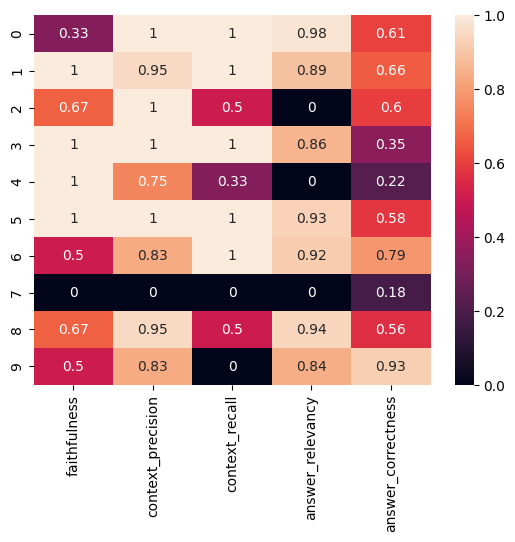

In [66]:
sns.heatmap(result[["faithfulness", "context_precision", "context_recall", "answer_relevancy", "answer_correctness"]], annot=True)
plt.show()
